In [1]:
library(DESeq2)

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which

## Less than .000001 (Not included in analysis) Look below for 'Greater than .0001'

In [39]:
data = read.table(file= "T2_filtered_less_000001.csv", header = T, sep = ',', check.names=FALSE, row.names=1)
data

,570_T2,571_T2,572_T2,573_T2,574_T2,575_T2,576_T2,577_T2,578_T2,580_T2,⋯,594_T2,595_T2,596_T2,597_T2,598_T2,599_T2,600_T2,601_T2,602_T2,603_T2
s_Micrococcus_flavus,0,4,10,11,0,17,0,16,16,7,⋯,0,5,4,5,1,11,2,12,4,4
s_Actinomadura_hibisca,0,1,2,4,1,6,0,15,1,8,⋯,5,7,1,5,1,9,6,6,11,11
s_Microbispora_rosea,5,5,3,5,1,8,1,17,5,5,⋯,2,3,2,7,4,15,4,8,3,4
s_Ralstonia_sp._JS705,13,5,0,19,22,8,5,1,9,2,⋯,1,2,6,6,20,14,6,4,12,6
s_Nostoc_sp.__Peltigera_membranacea_cyanobiont_,3,2,8,2,2,1,1,25,0,30,⋯,1,6,4,5,4,37,1,19,3,2
s_Streptococcus_ratti,4,4,5,10,4,6,4,2,4,9,⋯,13,8,7,5,9,1,2,10,1,7
s_uncultured_bacterium_F39-01,2,17,5,9,6,12,1,5,9,5,⋯,31,15,4,12,3,1,1,6,6,16
s_uncultured_bacterium_Contig1758,20,25,1,12,10,7,0,1,26,6,⋯,2,8,3,10,10,10,4,8,2,13
s_uncultured_bacterium_BD_contig00381,2,3,7,8,4,7,1,2,7,2,⋯,11,9,5,6,7,1,9,5,5,19
s_Jannaschia_seosinensis,2,9,5,5,7,3,1,3,5,7,⋯,11,9,10,6,3,0,13,4,12,15


In [40]:
mapping = read.table(file = "Deseq2_T2_mapping.txt", header = T, sep="\t")
mapping

Sample,Treatment
570_T2,Placebo
571_T2,Placebo
572_T2,Placebo
573_T2,Placebo
574_T2,Placebo
575_T2,Placebo
576_T2,Placebo
577_T2,Placebo
578_T2,Let
580_T2,Let


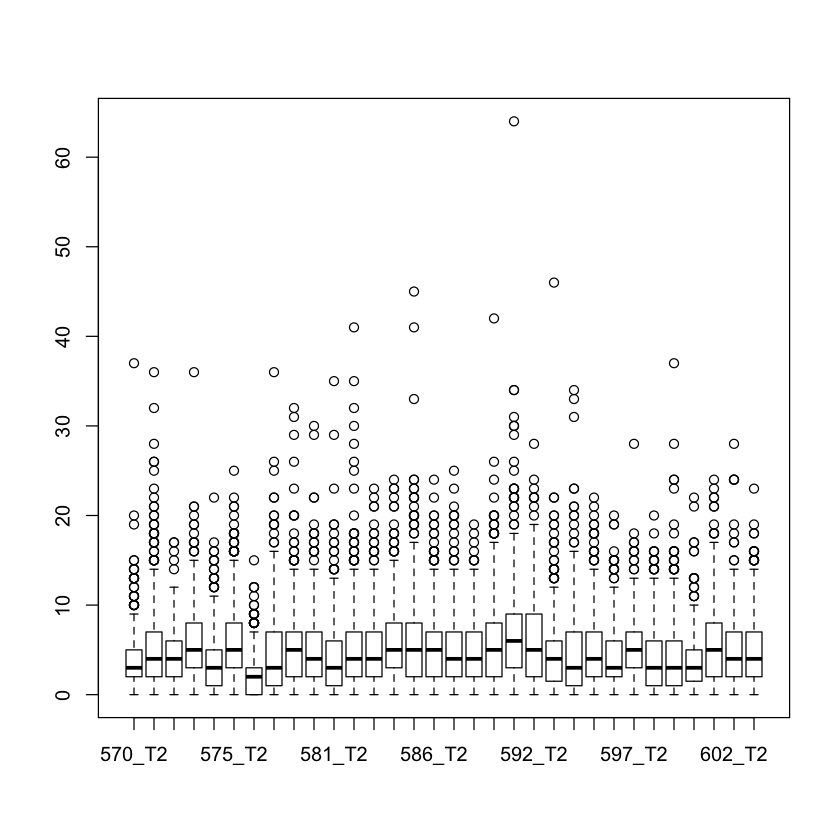

In [41]:
boxplot(data)

In [42]:
dds = DESeqDataSetFromMatrix(countData = data, colData = mapping, design = ~ Treatment)
dds

converting counts to integer mode


class: DESeqDataSet 
dim: 463 32 
metadata(1): version
assays(1): counts
rownames(463): s_Micrococcus_flavus s_Actinomadura_hibisca ...
  s_Mesorhizobium_sp._R88B s_Streptomyces_sp._KIB-H033
rowData names(0):
colnames(32): 570_T2 571_T2 ... 602_T2 603_T2
colData names(2): Sample Treatment

In [43]:
dds$Treatment = relevel(dds$Treatment, ref = "Let")

In [44]:
dds = DESeq(dds, fitType="local")
dds

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


class: DESeqDataSet 
dim: 463 32 
metadata(1): version
assays(5): counts mu H cooks originalCounts
rownames(463): s_Micrococcus_flavus s_Actinomadura_hibisca ...
  s_Mesorhizobium_sp._R88B s_Streptomyces_sp._KIB-H033
rowData names(26): baseMean baseVar ... maxCooks replace
colnames(32): 570_T2 571_T2 ... 602_T2 603_T2
colData names(4): Sample Treatment sizeFactor replaceable

In [20]:
result = results(dds)
res = result[order(result$padj),]
res

log2 fold change (MLE): Treatment Placebo vs Let 
Wald test p-value: Treatment Placebo vs Let 
DataFrame with 3539 rows and 6 columns
                                       baseMean        log2FoldChange
                                      <numeric>             <numeric>
s_Burkholderia_pyrrocinia       228.01903708258     0.398634631451987
s_uncultured_bacterium_BAC25G1 28885.2756112912      1.26146606489076
s_Desulfovibrio_vulgaris       5238.10649756757     0.219668560710535
s_Lactobacillus_gasseri        3605.88484565479     -1.36173496020759
s_Rhizobium_sp._NT-26          568.010453343283     0.235691304526767
...                                         ...                   ...
s_Chthonomonas_calidirosea     437.510511512656 -0.000377718880261644
s_Sedimenticola_thiotaurini    818.865384519901  0.000451853898547058
s_Cronobacter_turicensis       352.878239934386  9.67273754176527e-05
s_Paraburkholderia_rhizoxinica 279.500761238227  0.000184420608250901
s_Hafnia_sp._CBA7124      

In [46]:
write.table(res, file = "T2_filtered_less_000001_PvL_deseq.csv", sep = ",", quote = FALSE, row.names = TRUE, col.names = NA)

In [47]:
LvCoL = results(dds, c("Treatment", "CoL", "Let"))
LvCoL = LvCoL[order(result$padj),]
write.table(LvCoL, file = "T2_filtered_less_000001_CoLvL_deseq.csv", sep = ",", quote = FALSE, row.names = TRUE, col.names = NA)

# Greater than .00001

In [7]:
data = read.table(file= "T2_filtered_greater_00001.csv", header = T, sep = ',', check.names=FALSE, row.names=1)
data

,570_T2,571_T2,572_T2,573_T2,574_T2,575_T2,576_T2,577_T2,578_T2,580_T2,⋯,594_T2,595_T2,596_T2,597_T2,598_T2,599_T2,600_T2,601_T2,602_T2,603_T2
s_Bacteroides_caecimuris,527122,293835,276306,670919,535250,309961,451212,545790,204205,245353,⋯,429686,619379,431181,339492,529517,190934,321198,285499,595056,404745
s_uncultured_bacterium,325637,261818,204979,355951,318482,269300,186350,204468,266680,179967,⋯,401954,360506,305186,279338,385246,178775,288866,261782,353760,320222
s_Parabacteroides_sp._YL27,253494,159137,226829,431469,406124,311003,171948,79588,227261,127828,⋯,667554,475791,397845,285876,407464,83332,273518,209368,348571,439531
s_Muribaculum_intestinale,253379,157979,223962,427515,403875,312052,171793,79304,224611,127816,⋯,663270,470772,395691,285743,408143,82917,271571,207274,346876,439935
s_Bifidobacterium_pseudolongum,185785,102925,121807,189840,319059,146653,10729,1561,508654,74669,⋯,141529,171483,139101,209153,142998,53719,246320,213615,379001,493837
s_Lachnoclostridium_sp._YL32,62098,279748,103463,158591,37010,186321,40917,246713,245135,230194,⋯,35153,34375,66021,142498,61084,364689,44458,184525,67044,66123
s_Parabacteroides_sp._CT06,233833,54199,69793,153173,116638,71024,91084,121842,68655,41526,⋯,86158,167684,95223,120644,158014,46714,145736,116425,116302,111645
s_Parabacteroides_distasonis,212617,44270,59257,132920,97531,59104,79312,108088,59371,35013,⋯,67606,147554,80024,106670,135779,41149,125135,103015,95617,94208
s_Alistipes_shahii,139214,103454,59827,123214,107827,70506,65196,54614,56484,71170,⋯,120846,114714,103515,87667,111528,29420,102016,80523,150728,102463
s_Bacteroides_xylanisolvens,125876,65787,59731,135818,111103,62784,103190,155811,44789,59007,⋯,72428,156912,85752,71172,107632,42560,82391,74286,138655,86220


In [8]:
dds = DESeqDataSetFromMatrix(countData = data, colData = mapping, design = ~ Treatment)
dds

converting counts to integer mode


class: DESeqDataSet 
dim: 3539 32 
metadata(1): version
assays(1): counts
rownames(3539): s_Bacteroides_caecimuris s_uncultured_bacterium ...
  s_uncultured_bacterium_DCM005Carb03
  s_uncultured_bacterium_gwf2_scaffold_608
rowData names(0):
colnames(32): 570_T2 571_T2 ... 602_T2 603_T2
colData names(2): Sample Treatment

In [10]:
dds$Treatment = relevel(dds$Treatment, ref = "Let")
dds = DESeq(dds, fitType="local")
dds

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 14 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


class: DESeqDataSet 
dim: 3539 32 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(3539): s_Bacteroides_caecimuris s_uncultured_bacterium ...
  s_uncultured_bacterium_DCM005Carb03
  s_uncultured_bacterium_gwf2_scaffold_608
rowData names(31): baseMean baseVar ... maxCooks replace
colnames(32): 570_T2 571_T2 ... 602_T2 603_T2
colData names(4): Sample Treatment sizeFactor replaceable

In [15]:
result = results(dds)
res = result[order(result$padj),]
res

log2 fold change (MLE): Treatment Placebo vs Let 
Wald test p-value: Treatment Placebo vs Let 
DataFrame with 3539 rows and 6 columns
                                       baseMean        log2FoldChange
                                      <numeric>             <numeric>
s_Burkholderia_pyrrocinia       228.01903708258     0.398634631451987
s_uncultured_bacterium_BAC25G1 28885.2756112912      1.26146606489076
s_Desulfovibrio_vulgaris       5238.10649756757     0.219668560710535
s_Lactobacillus_gasseri        3605.88484565479     -1.36173496020759
s_Rhizobium_sp._NT-26          568.010453343283     0.235691304526767
...                                         ...                   ...
s_Chthonomonas_calidirosea     437.510511512656 -0.000377718880261644
s_Sedimenticola_thiotaurini    818.865384519901  0.000451853898547058
s_Cronobacter_turicensis       352.878239934386  9.67273754176527e-05
s_Paraburkholderia_rhizoxinica 279.500761238227  0.000184420608250901
s_Hafnia_sp._CBA7124      

In [15]:
write.table(res, file = "T2_filtered_greater_00001_PvL_deseq.csv", sep = ",", quote = FALSE, row.names = TRUE, col.names = NA)

In [16]:
LvCoL = results(dds, c("Treatment", "CoL", "Let"))
LvCoL = LvCoL[order(result$padj),]
write.table(LvCoL, file = "T2_filtered_greater_00001_CoLvL_deseq.csv", sep = ",", quote = FALSE, row.names = TRUE, col.names = NA)

In [26]:
result = results(dds, pAdjustMethod = "hommel")
res = result[order(result$padj),]
res

log2 fold change (MLE): Treatment Placebo vs Let 
Wald test p-value: Treatment Placebo vs Let 
DataFrame with 3539 rows and 6 columns
                                                 baseMean     log2FoldChange
                                                <numeric>          <numeric>
s_Burkholderia_pyrrocinia                 228.01903708258  0.398634631451987
s_uncultured_bacterium_BAC25G1           28885.2756112912   1.26146606489076
s_Streptomyces_antibioticus              78.3693880365544  0.672788401925096
s_Rhizobium_sp._NT-26                    568.010453343283  0.235691304526767
s_uncultured_bacterium_Contigcl_1787     99.5525909220438  -1.38898630084615
...                                                   ...                ...
s_uncultured_Geobacter_sp.                54.546053049925  0.219115798906122
s_Prochlorococcus_sp._RS50               74.4932648908574 -0.528993096719266
s_Bordetella_pertussis                   61.2679547287748 -0.234303280636302
s_uncultured_bacter